## **Data overview**

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import re #pattern searching in a string
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import joblib
sns.set(style='darkgrid')

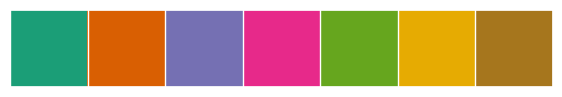

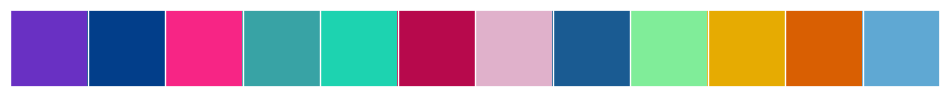

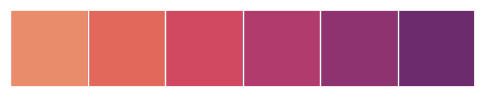

In [2]:
qual_colors1 = ['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']
qual_colors1 = sns.color_palette(sns.color_palette(qual_colors1))
sns.palplot(qual_colors1)

qual_colors2 = ['#6930c3','#023e8a','#F72585','#38a3a5','#1dd3b0','#b7094c','#e0b1cb','#1a5b92','#80ed99','#e6ab02','#d95f02','#5fa8d3']
qual_colors2 = sns.color_palette(sns.color_palette(qual_colors2))
sns.palplot(qual_colors2)

num_pal = sns.color_palette("flare")
sns.palplot(num_pal)

In [4]:
df18 = pd.read_csv('C:/Users/toang/Desktop/data_csv/data_2018.csv', parse_dates=['transaction_date'])
df19 = pd.read_csv('C:/Users/toang/Desktop/data_csv/data_2019.csv', parse_dates=['transaction_date'])
df20 = pd.read_csv('C:/Users/toang/Desktop/data_csv/data_2020.csv', parse_dates=['transaction_date'])
df21 = pd.read_csv('C:/Users/toang/Desktop/data_csv/data_2021.csv', parse_dates=['transaction_date'])
df22 = pd.read_csv('C:/Users/toang/Desktop/data_csv/data_2022.csv', parse_dates=['transaction_date'])


In [5]:
total = pd.concat([df18,df19,df20,df21,df22],axis=0)
print(total.shape)
total.sample(5)

(8454383, 12)


,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year
1633069,483411946,613765413,2114.5037,0.0,2021-03-17,MSH ITMSH02856 Slim LS Burgundy 2XL,MSH ITMSH02856 Slim LS Burgundy 2XL,Burgundy,2XL,North,North_7245,2021
167167,355696661,525282305,2379.1500,0.0,2019-12-23,MSH ITMSH01626 Slim SS Pink M,MSH ITMSH01626 Slim SS Pink M,Pink,M,South,South_7032,2019
1293203,362906572,361915008,1456.7181,0.0,2018-01-10,DENIM CORE-ITDND062 5P BROOKLYN Dk Wash 30 / 77CM,MENS DENIM,Dark Wash,30,South,South_7002,2018
1124520,393727452,373781256,2199.0000,0.0,2018-03-25,ITMSH00116,Mens Shirt - Jeanswear,Rust,L,South,South_7077,2018
428746,405380242,517629762,99.0000,0.0,2019-11-29,CCB ITPCB00001 NA NA Natural 6,NaN,NOT-CAPTURED,NOT-CAPTURED,East,East_7258,2019


In [5]:
total.describe()
total.dtypes

user_id                        int64
bill_id                        int64
line_item_amount             float64
bill_discount                float64
transaction_date      datetime64[ns]
description                   object
inventory_category            object
colour                        object
size                          object
zone_name                     object
store_name                    object
year                           int64
dtype: object

In [6]:
def find_nan(df):
    columns = df.columns
    col_values = total.isna().sum().values
    temp = pd.DataFrame(data=col_values,index=columns,columns=['missing_count'])
    temp['percent_missing'] = np.round((temp['missing_count'] / total.shape[0]) *100 ,2)
    return temp

find_nan(total)

,missing_count,percent_missing
user_id,0,0.00
bill_id,0,0.00
line_item_amount,0,0.00
bill_discount,0,0.00
transaction_date,0,0.00
description,17,0.00
inventory_category,697444,8.25
colour,15555,0.18
size,15555,0.18
zone_name,0,0.00


In [7]:
# extract weekday and month from transaction date
total['month'] = total['transaction_date'].dt.month_name()
total['weekday'] = total['transaction_date'].dt.day_name()
total.sample(2)

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year,month,weekday
1288179,484284904,772833954,2.0,0.0,2022-10-22,CTRIMS ITCBM00003 NA NA WHITE 10X4X14,CTrims ITCBM00003 NA NA White ``10x4x14````,NOT-CAPTURED,NOT-CAPTURED,South,South_6057,2022,October,Saturday
835704,12758970,387666365,5.0,0.0,2018-06-05,CB REGULAR CARRY BAG,CARRY BAG,Navy,DEFAULT,South,South_7001,2018,June,Tuesday


In [8]:
total.head()

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year,month,weekday
0,403252497,401641461,1049.5,0.0,2018-08-11,TR ITA14TRK010 FF BROOKLYN STRAIGHT Beige 44 /...,TROUSER,Beige,44 / 112CM,East,East_7096,2018,August,Saturday
1,357000026,397716483,659.4,0.0,2018-07-22,MB ITA14BLT016 35MM NA Olive Green 32 /,MB ITA14BLT016 35MM NA Olive Green 32 - 97CM,OLIVE GREEN,32 / 97CM,North,North_7018,2018,July,Sunday
2,372773935,362298787,1899.0,0.0,2018-01-12,TR S15-NELSON FF KANSAS Tan 36 / 92CM,TROUSER,Tan,36 / 92CM,North,North_6505,2018,January,Friday
3,362714910,360637282,1799.0,0.0,2018-01-03,TR S15-BRANDON FF KANSAS Khaki 32 / 82CM,TROUSER,Khaki,32 / 82CM,North,North_6505,2018,January,Wednesday
4,393891557,374396867,1299.0,0.0,2018-03-29,MB ITA15BLT004 40MM NA Reddish Brown 38 / 112CM,ITA15BLT004-40MM,REDDISH BROWN,38 / 112CM,East,East_7310,2018,March,Thursday


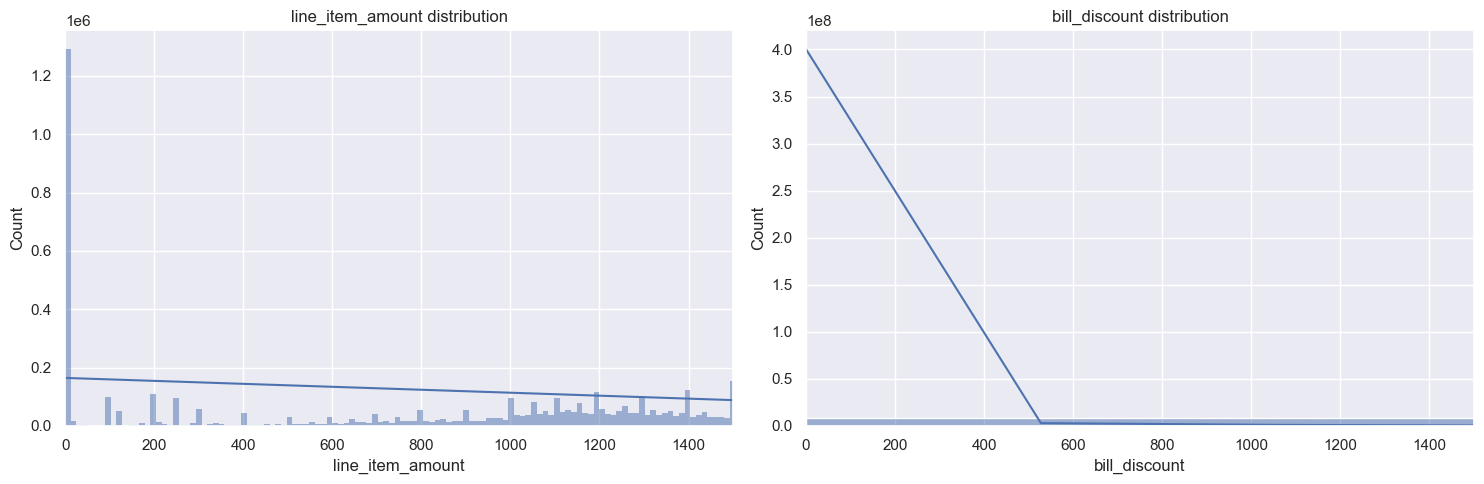

In [9]:
# numerical features distribution
fig , ax = plt.subplots(1,2,figsize=(15,5))
for i,col in enumerate(['line_item_amount','bill_discount']):
    sns.histplot(data=total,x=col,kde=True,ax=ax[i])
    ax[i].set_xlim([0,1500])
    ax[i].set_xlabel(col)
    ax[i].set_title(f'{col} distribution')

fig.tight_layout()
plt.show()

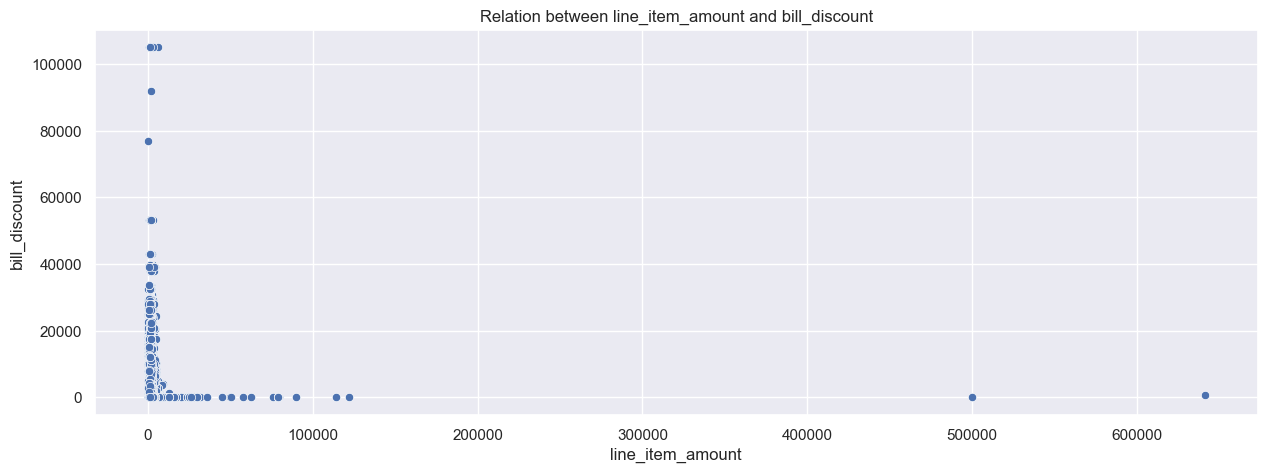

In [10]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=total,x='line_item_amount',y='bill_discount')
plt.title('Relation between line_item_amount and bill_discount')
plt.show()

## **Data Cleaning and FE**

In [11]:
def get_product(txt,pattern):
    if isinstance(txt, str):

        #search and check if split word exists
        searched_word = re.search(pattern, txt)

        #word exists
        if searched_word:
            splitted_string = re.split(pattern, txt)[0]
            # check if empty list is returned->when there is only pattern available in 'txt'
            if splitted_string == '':
                return 'Unknown'
            else:
                return splitted_string.strip()

        #split word not exists(but the product name can still be present , so we'll need the entire string)
        else:
            return txt

    # any other value found other than string datatype
    else:
        return 'Unknown'

total['desc_copy'] = total['description'].copy()
total['desc_copy'] = total['desc_copy'].fillna('Unknown')

#for patterns starting with IT,CORE-, A16-,A17-,S16-,S18-,TBA07SD7890(LENGTH=11)
total[['product']] = total[['desc_copy']].applymap(lambda row:get_product(row,pattern=r'IT[A-Z0-9]+|CORE-|\b[A-Z]\d{2}-|\b[A-Z0-9]{11}\b'))

#product names are acronyms are their lengths are not greater than 2.
total[['product']] = total[['product']].applymap(lambda row: 'Unknown' if len(row.split())>=2 else row)

#removing inconsistent data
total[['product']] = total[['product']].applymap(lambda row: 'Unknown' if re.search(r'\d+|size|name|bill|amount|quantity|email|address|number|city|state|country|code|customer|discount|sex', row,flags=re.IGNORECASE) else row)

In [12]:
# removing more inconsistent data
invalid_vals = ['CALandLine', 'CAMobile', 'Cashier','PendingOrders','DOB', 'DOA', 'LastVisit', 'Points',
'Anniversary', 'CashierMBO','OrderCashier','CreditLimit',
'DateOfAnniversary', 'OtherDetails', 'IsReminderRequired',
'AgreeToReceiveSMS', 'Gender', 'AwarenessSourceRemarks',
'AllowCredit', 'CreditDays', 'AgreeToReceiveCall', 'DateOfBirth','Administrator','MRPValue','CGST', 'BatchDescription',
'TaxDescription', 'IsActive', 'CardExpiryDate','DealerType','DND','DEFAULT']

total[['product']] = total[['product']].applymap(lambda val: 'Unknown' if val in invalid_vals else val)

In [13]:
total['ic_copy'] = total['inventory_category'].copy()
total['ic_copy'] = total['ic_copy'].fillna('Unknown')
total[['ic_copy']] = total[['ic_copy']].applymap(lambda row: re.sub(r'na','',row,flags=re.IGNORECASE))

total['colour'] = total['colour'].fillna('Unknown')
total['colour'] = total['colour'].str.replace('NOT-CAPTURED','Unknown')

total['size'] = total['size'].fillna('Unknown')
total['size'] = total['size'].str.replace('NOT-CAPTURED','Unknown')

In [14]:
## IDENTIFYING COLOURS
all_colours = total['colour'].value_counts().index.tolist()
pattern = r'\b(?:' + '|'.join(re.escape(color)  for color in all_colours if isinstance(color,str)) + r')\b'

def find(txt,pattern):
    x = re.findall(pattern, txt,flags=re.IGNORECASE)
    if x==[]:
        return ('Unknown')
    return ' '.join(x)

print('Unique colours count before:',len(total['colour'].unique()))

unknown_colours_bef = total[total['colour']=='Unknown'].shape[0]
total.loc[(total['colour']=='Unknown'),'colour'] = total.loc[(total['colour']=='Unknown'),'ic_copy'].map(lambda row: find(row,pattern))
unknown_colours_after = total[total['colour']=='Unknown'].shape[0]
print('Colours found: ',unknown_colours_bef - unknown_colours_after)

print('Unique colours count after:',len(total['colour'].unique()))

Unique colours count before: 402
Colours found:  2331166
Unique colours count after: 457


In [15]:
# colours with highest sales
highest_sales_colours = total[total['colour']!='Unknown'].groupby(['colour'])['line_item_amount'].median().sort_values(ascending=False)
highest_sales_colours[:20]

colour
Light Brown      5099.0000
Deep Grey        4499.2500
Teal+Choco       3999.0000
Fawn             3599.4000
Military         3599.4000
Navy+Choco       3119.4000
Blk+White        3119.4000
Silky            3082.8486
Slvr Grey        2969.0410
Denim            2786.7250
Black Matt       2699.4000
Olive Camo       2699.4000
Navy Camo        2699.4000
Burgandy         2699.0000
Black Mel        2619.2289
Midnight         2617.1702
Vintage Khaki    2599.0000
Sand Stone       2545.2908
Camel            2499.5000
Dk Brown         2499.0000
Name: line_item_amount, dtype: float64

In [16]:
## IDENTIFYING SIZE
all_size = total['size'].unique().tolist()
pattern = r'\b(?:' + '|'.join(re.escape(size) for size in all_size if isinstance(size,str)) + r')\b'

print('Unique size count before:',len(total['size'].unique()))

unknown_size_bef = total[total['size']=='Unknown'].shape[0]
total.loc[(total['size']=='Unknown'),'size'] = total.loc[(total['size']=='Unknown'),'ic_copy'].map(lambda row: find(row,pattern))
total.loc[(total['size']=='Unknown'),'size'] = total.loc[(total['size']=='Unknown'),'ic_copy'].map(lambda row: find(row,r'\d*x\d*x\d*|\d*mm|\d*cm|\d*m'))
unknown_size_after = total[total['size']=='Unknown'].shape[0]
print('Sizes found: ',unknown_size_bef - unknown_size_after)

print('Unique size count after:',len(total['size'].unique()))

Unique size count before: 68
Sizes found:  2559280
Unique size count after: 129


In [17]:
def find_size(txt,pattern):
    try:

        x = re.findall(pattern,txt,flags=re.IGNORECASE)
        if x==[]:
            return ('Unknown')

        x =  ', '.join(x)
        if x != '':
            return (txt.split(x)[1])
    except:
        return 'Unknown'

print('Unique sizes before:',len(total['size'].unique()))

unknown_size_bef = total[total['size']=='Unknown'].shape[0]
total.loc[(total['size']=='Unknown'),'size'] = total.loc[(total['size']=='Unknown'),'ic_copy'].map(lambda row: find_size(row,r'Size'))
#some rows contains sizes seperated by ( , ) like m,s  which is incorrect as at a time a product can have only 1 size
total[['size']] = total[['size']].applymap(lambda x: x.split(' ')[-1].strip() if ' ' in x else x)
unknown_size_after = total[total['size']=='Unknown'].shape[0]
print('Sizes found: ',unknown_size_bef - unknown_size_after)

print('Unique sizes after:',len(total['size'].unique()))

Unique sizes before: 129
Sizes found:  2146
Unique sizes after: 96


In [18]:
# comman sizes
comman_sizes = total[total['size']!='Unknown'].groupby(['size'])['size'].count().sort_values(ascending=False)
comman_sizes[:10]

size
M          1272218
L          1121393
S           812004
XL          616911
DEFAULT     587851
34          490535
32          407635
36          396651
2XL         358773
12x4x16     279502
Name: size, dtype: int64

In [19]:
replace = {'TR':'MENS TROUSER',
'MSP':'MENS SPORTSCOAT',
'BSP':'MENS SPORTSCOAT',
'TWB': 'MENS TROUSER WITH BELT',
'JKT': 'MENS JACKET',
'SH':'MENS SHIRT',
'MSH':'MENS SHIRT',
'MTR':'MENS TROUSER WITH BELT',
'MBL':'MENS BELT',
'BLT':'MENS BELT',
'SR':'MENS SHORTS',
'MTS':'MENS T-SHIRT',
'TS':'MENS T-SHIRT',
'BSH':'BOYS SHIRT',
'SW':'MENS SWEATER',
'BDE':'BOYS DENIM',
'MFW':'MENS FOOTWEAR',
'FW':'MENS FOOTWEAR',
'BDNM':'BOYS DENIM',
'SX':'MENS SOCKS',
'MSO':'MENS SHORTS',
'SO':'MENS SHORTS',
'MDE':'MENS DENIM',
'BTS':'BOYS T-SHIRT',
'BSO':'BOYS SHORTS',
'MDNM':'MENS DENIM',
'BTR':'BOYS TROUSER',
'MSW':'MENS SWEATER',
'SCKS':'MENS SOCKS',
'MSX':'MENS SOCKS',
'BSW':'BOYS SWEATER',
'MJKT':'MENS JACKET',
'MJA':'MENS JACKET',
'BJKT':'BOYS JACKET',
'BJO':'BOYS Jogger',
'MSC':'MENS JACKET',
'BS':'BOYS SHIRT',
'MWL':'Mens Wallet - Sportswear',
'BJA':'BOYS JACKET',
'BSR':'BOYS SHORTS',
'MDN':'MENS Denim Trouser',
'BDN':'Boys Denim Trouser - Jeanswear',
'KT':'MENS KNIT TROUSER',
'MJGR':'MENS JOGGER',
'TBG':'Trolley Bag',
'CBG':'CARRY BAG',
'MTIE':'MALE TIE',
'MJO':'MENS JOGGER',
'MWC':'MENS BANDI'}

total['product'] = total['product'].map(lambda x: replace[x] if x in replace.keys() else x)

## **Product Analysis**

In [20]:
print(total['line_item_amount'].describe())
print('-'*30)
print(total['bill_discount'].describe())

count    8.454383e+06
mean     1.334790e+03
std      9.843195e+02
min      0.000000e+00
25%      6.990000e+02
50%      1.352693e+03
75%      1.999000e+03
max      6.410010e+05
Name: line_item_amount, dtype: float64
------------------------------
count    8.454383e+06
mean     9.284983e+01
std      8.119705e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.049536e+05
Name: bill_discount, dtype: float64


In [21]:
## products with highest sales
highest_sales_products = total.groupby(['product'])['line_item_amount'].median().sort_values(ascending=False)
highest_sales_products[:10]

product
soap                      50000.0000
MENS SPORTSCOAT            4810.7656
MENS BANDI                 3373.9610
MENS JACKET                3060.1145
MENS Denim Trouser         2499.0000
MENS FOOTWEAR              1999.6000
MENS DENIM                 1999.0000
MENS TROUSER WITH BELT     1954.5580
MENS SHIRT                 1819.3000
MENS SWEATER               1679.4000
Name: line_item_amount, dtype: float64

In [22]:
# most discounted products
highest_discounted_products = total[total['product']!='Unknown'].groupby(['product'])['bill_discount'].median().sort_values(ascending=False)
highest_discounted_products[:5]

product
SHirts    151.85
soap        0.00
BWC         0.00
HHP         0.00
FFT         0.00
Name: bill_discount, dtype: float64

In [23]:
# comman(or most buyed) products
comman_products = total[total['product']!='Unknown'].groupby(['product'])['product'].count().sort_values(ascending=False)
comman_products[:5]

product
MENS SHIRT                2706356
MENS TROUSER WITH BELT    1175228
CARRY BAG                  808099
MENS T-SHIRT               521117
MENS DENIM                 470342
Name: product, dtype: int64

In [24]:
# sales of products with colour
products_with_colour = total[(total['product']!='Unknown')&(total['colour']!='Unknown')].groupby(['product','colour'])['line_item_amount'].median().reset_index().sort_values('line_item_amount',ascending=False)
products_with_colour[:10]

,product,colour,line_item_amount
1100,MENS SPORTSCOAT,Beige,6299.10000
1112,MENS SPORTSCOAT,Lt Grey,6249.00000
1109,MENS SPORTSCOAT,Khaki,5978.52250
741,MENS JACKET,Ink Blue,5858.02880
1117,MENS SPORTSCOAT,Sky,5749.00000
1118,MENS SPORTSCOAT,Wine,5749.00000
1108,MENS SPORTSCOAT,Indigo,5749.00000
745,MENS JACKET,Lt Khaki,5637.78100
1113,MENS SPORTSCOAT,Maroon,5365.10665
1111,MENS SPORTSCOAT,Lt Brown,5264.77830


In [25]:
# highest sales of products with size
products_with_size = total[(total['product']!='Unknown')&(total['size']!='Unknown')].groupby(['product','size'])['line_item_amount'].median().sort_values(ascending=False)
products_with_size[:10]

product          size
MENS SPORTSCOAT  2XL     4983.27150
                 S       4873.83600
                 M       4806.75100
                 L       4798.96000
                 XL      4798.88000
                 3XL     4388.46420
MENS BANDI       S       3446.53660
                 M       3427.55100
                 2XL     3372.90575
                 XL      3353.79170
Name: line_item_amount, dtype: float64

## **Time Analysis**

In [26]:
# What is the total revenue for every year?
total_sales_every_year = total.groupby(['year'])['line_item_amount'].sum()
total_sales_every_year

year
2018    1.900333e+09
2019    2.103860e+09
2020    1.579160e+09
2021    2.302388e+09
2022    3.399087e+09
Name: line_item_amount, dtype: float64

In [27]:
def lineplot(data,x,y,hue,hue_order,title=None,xlabel=None):
    plot = sns.lineplot(data=data,x=x,y=y,markers=True, dashes=True,hue=hue,hue_order=hue_order,style=hue,palette=qual_colors2)
    plt.xlabel(xlabel)
    plt.ylabel(f'{y}')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    return plot

def barplot(x,y,data=None,ax=None,order=None,palette=qual_colors2,labelrotation=0,title=None):
    plot1 = sns.barplot(data=data,x=x,y=y,ax=ax,order=order,palette=palette)
    ax.bar_label(plot1.containers[0])
    ax.set_xlabel('')
    ax.set_ylabel(f'{y}')
    ax.set_title(title)
    ax.tick_params(labelrotation=labelrotation)
    return plot1

c:\Users\toang\miniconda3\envs\test\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


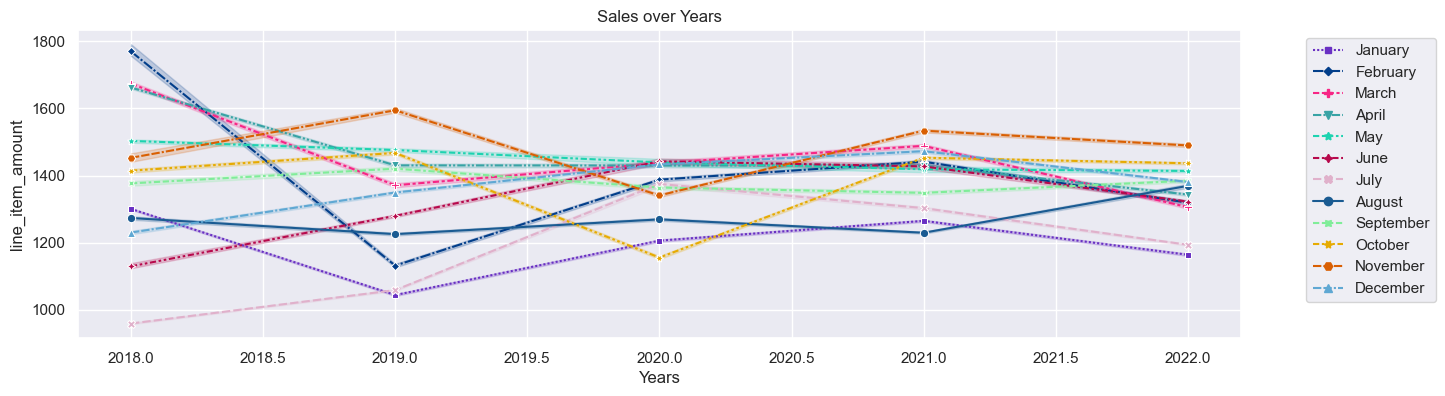

In [28]:
# What are the sales trends over different years or months?
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
fig = plt.figure(figsize=(15,4))
lineplot(data=total,x="year",y='line_item_amount',hue='month',hue_order=month_order,title='Sales over Years',xlabel='Years')
# fig.supxlabel('Years')
fig.show()

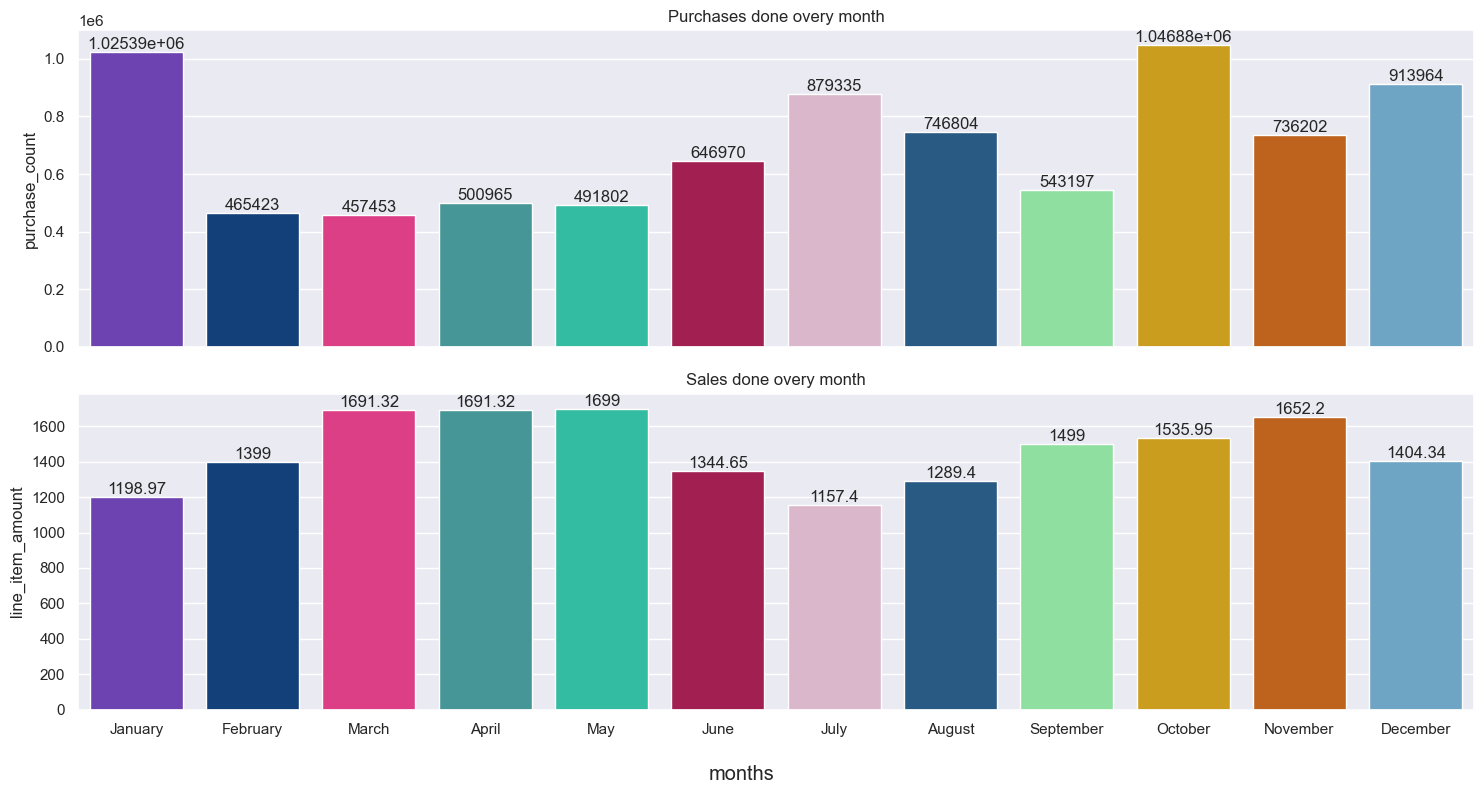

In [29]:
# number of purcheses made each month
purchases_on_each_month = pd.DataFrame(total.groupby(['month'])['month'].count()).rename(columns={'month':'purchase_count'}).reset_index()

# average sales on each month
sales_on_months = total.groupby(['month'])['line_item_amount'].median().reset_index()

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,8),sharex=True)
barplot(data=purchases_on_each_month,x='month',y='purchase_count',ax=ax1,order=month_order,title='Purchases done overy month')

barplot(data=sales_on_months,x='month',y='line_item_amount',ax=ax2,order=month_order,title='Sales done overy month')
fig.supxlabel('months')

fig.tight_layout()

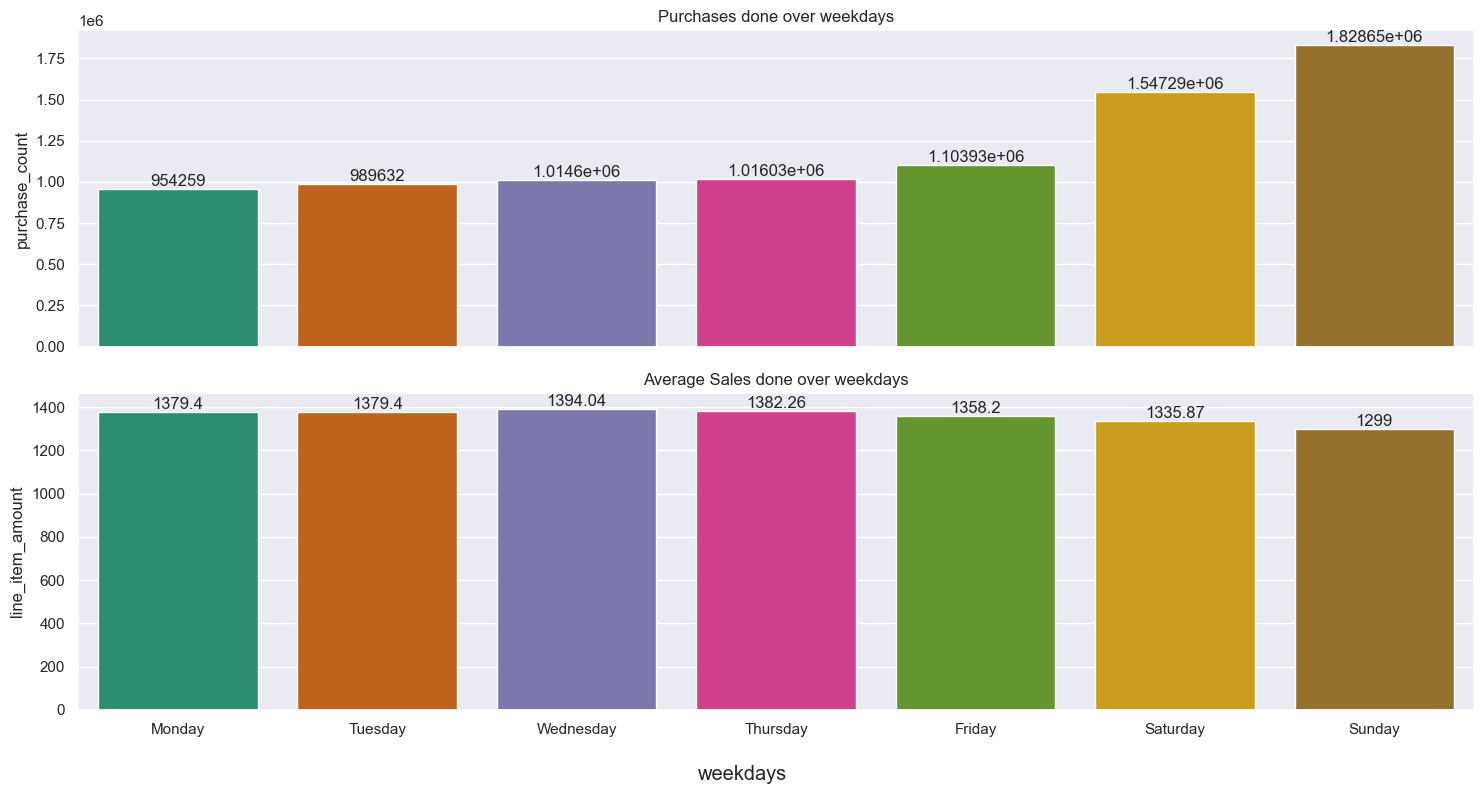

In [30]:
# What are the busiest shopping times of the day or week?
purchases_on_weekdays = pd.DataFrame(total.groupby(['weekday'])['weekday'].count()).rename(columns={'weekday':'purchase_count'}).reset_index()

# average sales on each weekday
sales_on_weekdays = total.groupby(['weekday'])['line_item_amount'].median().reset_index()

week_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

fig,(ax1,ax2) = plt.subplots(2,1,figsize=(15,8),sharex=True)
barplot(data=purchases_on_weekdays,x='weekday',y='purchase_count',ax=ax1,order=week_order,palette=qual_colors1,title='Purchases done over weekdays')

barplot(data=sales_on_weekdays,x='weekday',y='line_item_amount',ax=ax2,order=week_order,palette=qual_colors1,title='Average Sales done over weekdays')
fig.supxlabel('weekdays')

fig.tight_layout()

In [31]:
# Which products are most buyed on each year
yearly_most_buyed = total[(total['product']!='Unknown')].groupby(['year','product'])['product'].count().sort_values(ascending=False)
yearly_most_buyed[:10]

year  product               
2022  MENS SHIRT                846856
2019  MENS SHIRT                588494
2021  MENS SHIRT                551088
2020  MENS SHIRT                420666
2022  MENS TROUSER WITH BELT    362136
2018  MENS SHIRT                299252
2022  CTRIMS                    275206
2019  MENS TROUSER WITH BELT    270771
2021  MENS TROUSER WITH BELT    236944
2019  CARRY BAG                 234958
Name: product, dtype: int64

In [32]:
# Which products are most buyed on each month and weekday
monthly_most_buyed = total[(total['product']!='Unknown')].groupby(['month','weekday','product'])['product'].count().sort_values(ascending=False)
monthly_most_buyed[:10]

month     weekday   product   
January   Sunday    MENS SHIRT    80751
October   Sunday    MENS SHIRT    73653
January   Saturday  MENS SHIRT    69099
October   Saturday  MENS SHIRT    65622
July      Sunday    MENS SHIRT    64139
August    Sunday    MENS SHIRT    58776
December  Sunday    MENS SHIRT    58139
July      Saturday  MENS SHIRT    54972
December  Saturday  MENS SHIRT    54725
August    Saturday  MENS SHIRT    51285
Name: product, dtype: int64

## **Store Performance**

c:\Users\toang\miniconda3\envs\test\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == "":


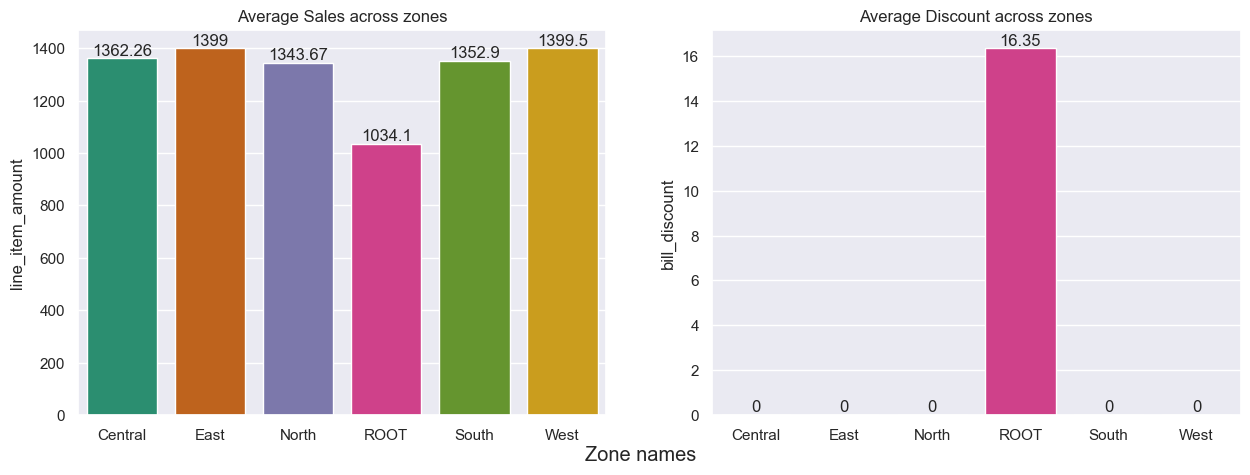

In [33]:
#  How does store performance vary by zone?
zones_sales_mean = total.groupby(['zone_name'])['line_item_amount'].median().reset_index()
zones_discount_mean = total.groupby(['zone_name'])['bill_discount'].median().reset_index()

fig,(ax1,ax2) = plt.subplots(1,2,sharex=True,figsize=(15,5))

barplot(data = zones_sales_mean , x='zone_name',y='line_item_amount',ax=ax1,palette=qual_colors1,title='Average Sales across zones')

barplot(data = zones_discount_mean ,x='zone_name',y='bill_discount',ax=ax2,palette=qual_colors1,title='Average Discount across zones')

fig.supxlabel('Zone names')
fig.show()

c:\Users\toang\miniconda3\envs\test\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


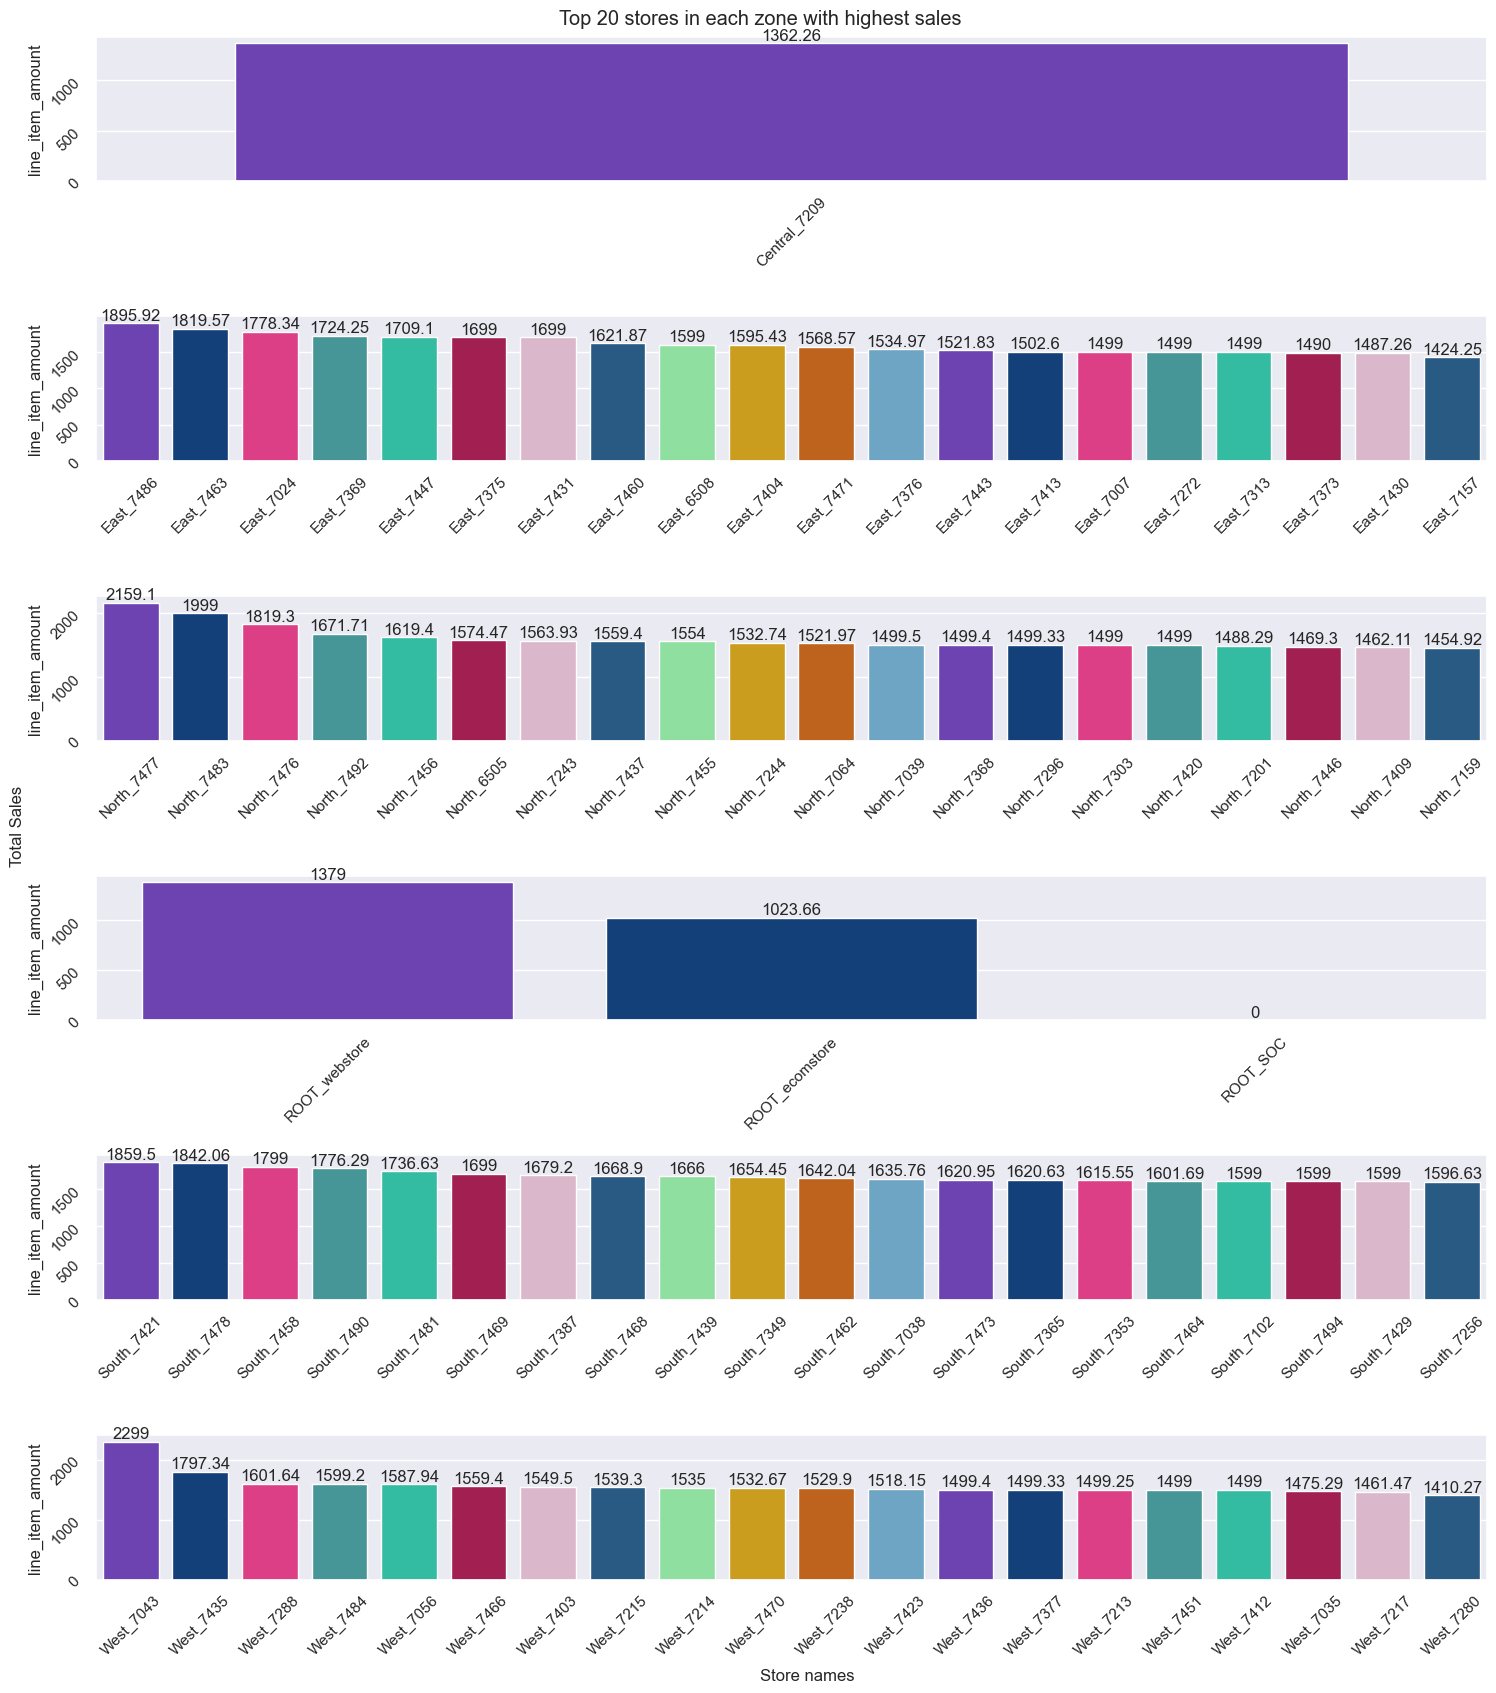

In [34]:
# stores from each zones with highest sales
zone_and_store_sales = total.groupby(['zone_name','store_name'])['line_item_amount'].median().reset_index()

# sales in different zones stores
zones = zone_and_store_sales.zone_name.unique().tolist()

fig , ax = plt.subplots(6,figsize=(15,17))

for i,zone in enumerate(zones):
    stores_with_highest_sales = zone_and_store_sales[zone_and_store_sales['zone_name']==zone].sort_values('line_item_amount',ascending=False)[:20]

    bar = barplot(data = stores_with_highest_sales , x='store_name',y='line_item_amount',ax=ax[i],labelrotation=45,title='')

fig.suptitle('Top 20 stores in each zone with highest sales')
fig.tight_layout()

fig.text(0.00, 0.5, 'Total Sales', va='center', rotation='vertical')
fig.text(0.5, 0, 'Store names', va='center')

fig.show()

## **Apriori apply test**

In [35]:
from mlxtend.frequent_patterns import association_rules, apriori

In [36]:
# Create a copy of 'total' and drop rows with missing values
retail = total.dropna()

# Display the shape of the new 'retail' DataFrame
print(retail.shape)


(7756929, 17)


In [37]:
# Cleaning the description column
retail['product'] = retail['product'].astype(str).str.strip().str.lower()


c:\Users\toang\miniconda3\envs\test\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


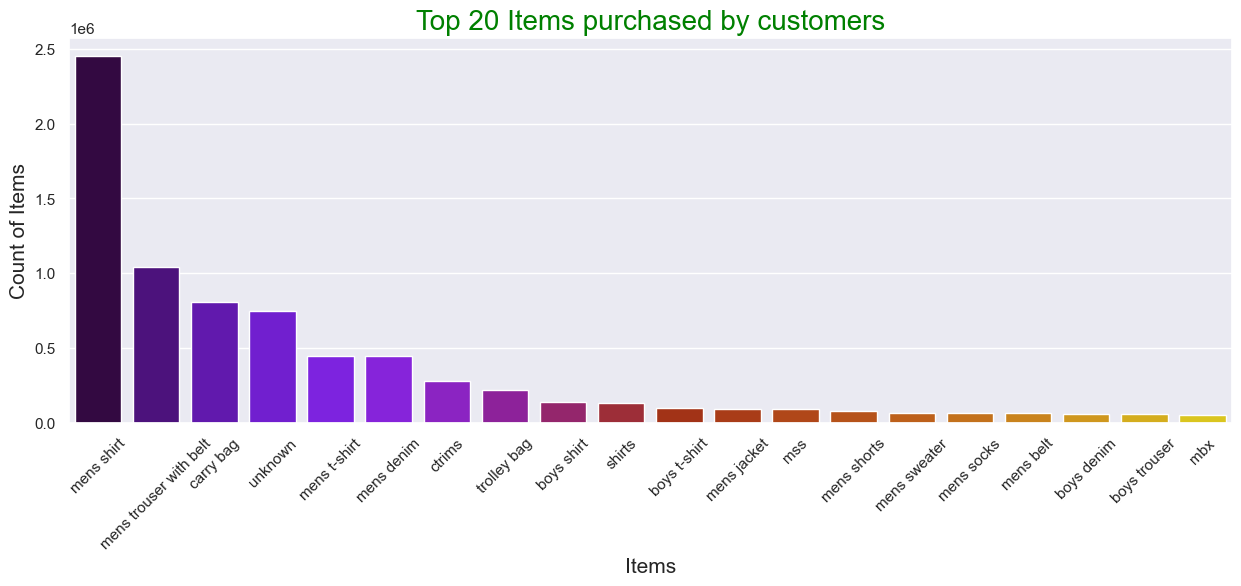

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x = retail['product'].value_counts().head(20).index, 
            y = retail['product'].value_counts().head(20).values, 
            palette = 'gnuplot')
plt.xlabel('Items', size = 15)
plt.xticks(rotation=45)
plt.ylabel('Count of Items', size = 15)
plt.title('Top 20 Items purchased by customers', color = 'green', size = 20)
plt.show()


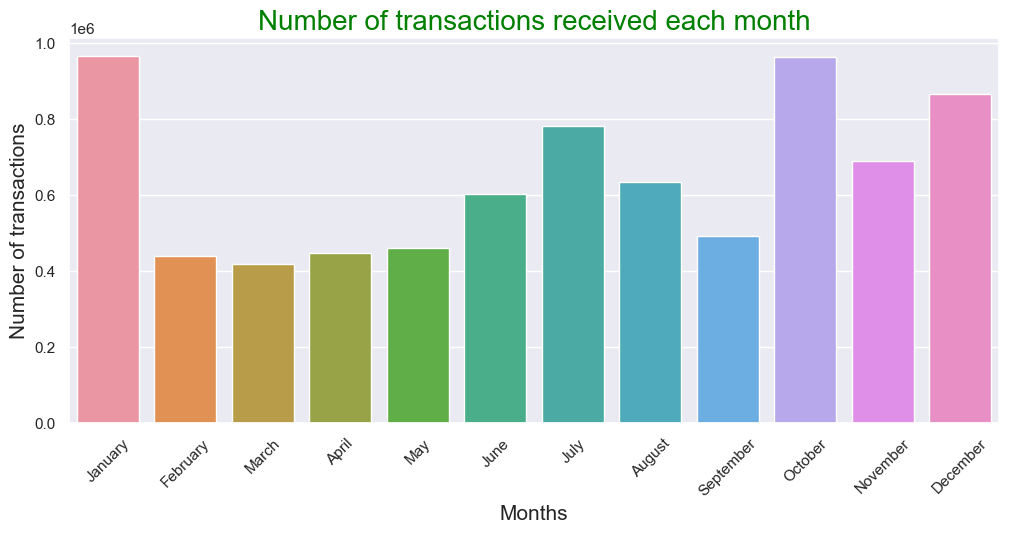

In [39]:
# Count transactions per month
month_tran = retail.groupby('month')['bill_id'].count().reset_index()

# Map months to their order for sorting
month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
               'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
month_tran['month_order'] = month_tran['month'].map(month_order)

# Sort by month order
month_tran.sort_values("month_order", inplace=True)

# Create the bar plot
plt.figure(figsize=(12, 5))
sns.barplot(data=month_tran, x="month", y="bill_id")
plt.xlabel('Months', size=15)
plt.ylabel('Number of transactions', size=15)
plt.title('Number of transactions received each month', color='green', size=20)
plt.xticks(rotation=45) 
plt.show()


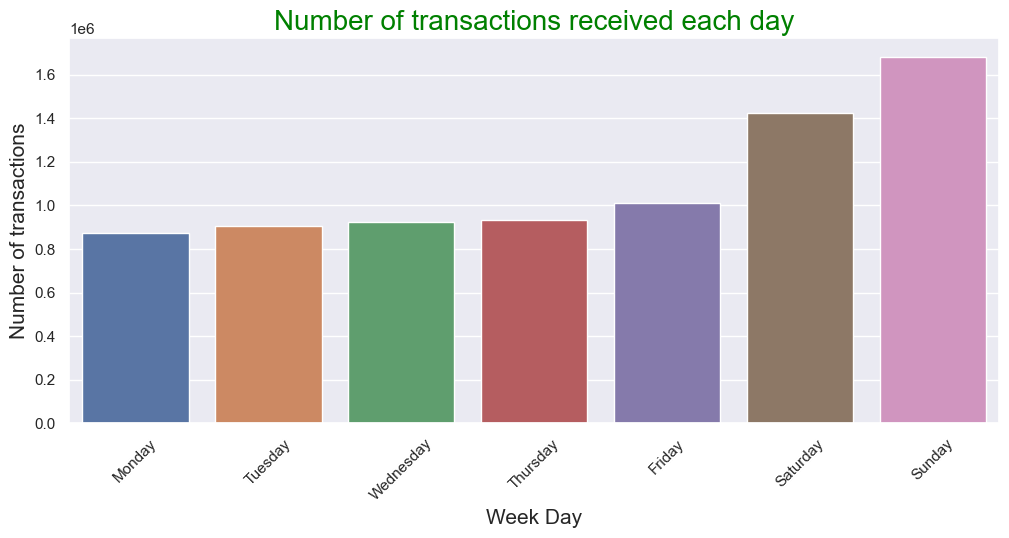

In [40]:
# Count transactions per weekday
week_tran = retail.groupby('weekday')['bill_id'].count().reset_index()

# Manually define the order of weekdays for sorting
weekday_order = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
week_tran['weekday_order'] = week_tran['weekday'].map(weekday_order)

# Sort by weekday order
week_tran.sort_values("weekday_order", inplace=True)

# Create the bar plot
plt.figure(figsize=(12, 5))
sns.barplot(data=week_tran, x="weekday", y="bill_id")
plt.xlabel('Week Day', size=15)
plt.ylabel('Number of transactions', size=15)
plt.title('Number of transactions received each day', color='green', size=20)
plt.xticks(rotation=45)
plt.show()


In [41]:
# Count item occurrences within each transaction
transactions_str = (
    retail.groupby(['bill_id', 'product'])['product']
    .count()
    .reset_index(name='count')
)

print(transactions_str.head().to_markdown(index=False, numalign="left", stralign="left"))


| bill_id   | product    | count   |
|:----------|:-----------|:--------|
| 360301332 | unknown    | 2       |
| 360302425 | unknown    | 2       |
| 360304072 | unknown    | 1       |
| 360304673 | mens denim | 1       |
| 360304720 | denim      | 1       |


In [42]:
# Create a transaction-item matrix (pivot table)
basket_matrix = (
    transactions_str.pivot_table(index='bill_id', columns='product', values='count', aggfunc='sum')
    .fillna(0)
)

# Binarize the matrix (0 or 1)
basket_matrix = (basket_matrix > 0).astype(int)

# Display the first 5 rows of the basket matrix
print(basket_matrix.head().to_markdown(index=False, numalign="left", stralign="left"))


| b   | bbg   | bcp   | bmk   | boys denim   | boys denim trouser - jeanswear   | boys jacket   | boys jogger   | boys shirt   | boys shorts   | boys sweater   | boys t-shirt   | boys trouser   | bss   | btie   | bwc   | carry bag   | cothers   | ctrims   | denim   | duffelbag   | ffb   | fft   | hhp   | lbg   | male tie   | mb   | mbx   | mens bandi   | mens belt   | mens denim   | mens denim trouser   | mens footwear   | mens jacket   | mens jogger   | mens knit trouser   | mens shirt   | mens shorts   | mens socks   | mens sportscoat   | mens sweater   | mens t-shirt   | mens trouser   | mens trouser with belt   | mens wallet - sportswear   | mmk   | mrg   | ms   | mss   | shirts   | soap   | trolley bag   | unknown   | wlt   | wothers   |
|:----|:------|:------|:------|:-------------|:---------------------------------|:--------------|:--------------|:-------------|:--------------|:---------------|:---------------|:---------------|:------|:-------|:------|:------------|:----------|:

In [43]:
# Create a transaction-item matrix (pivot table)
basket_matrix = (
    retail.groupby(['bill_id', 'product'])['product'].count()
    .unstack(fill_value=0)  
    .reset_index()
    .rename_axis(None, axis=1) 
)

# Binarize the matrix (0 or 1)
basket_matrix.iloc[:, 1:] = (basket_matrix.iloc[:, 1:] > 0).astype(int)

print(basket_matrix.head().to_markdown(index=False, numalign="left", stralign="left"))


| bill_id     | b   | bbg   | bcp   | bmk   | boys denim   | boys denim trouser - jeanswear   | boys jacket   | boys jogger   | boys shirt   | boys shorts   | boys sweater   | boys t-shirt   | boys trouser   | bss   | btie   | bwc   | carry bag   | cothers   | ctrims   | denim   | duffelbag   | ffb   | fft   | hhp   | lbg   | male tie   | mb   | mbx   | mens bandi   | mens belt   | mens denim   | mens denim trouser   | mens footwear   | mens jacket   | mens jogger   | mens knit trouser   | mens shirt   | mens shorts   | mens socks   | mens sportscoat   | mens sweater   | mens t-shirt   | mens trouser   | mens trouser with belt   | mens wallet - sportswear   | mmk   | mrg   | ms   | mss   | shirts   | soap   | trolley bag   | unknown   | wlt   | wothers   |
|:------------|:----|:------|:------|:------|:-------------|:---------------------------------|:--------------|:--------------|:-------------|:--------------|:---------------|:---------------|:---------------|:------|:-------|:------

In [44]:
# Apply Apriori algorithm (use the basket_matrix directly)
frequent_itemsets = apriori(basket_matrix.set_index('bill_id'), min_support=0.01, use_colnames=True)
frequent_itemsets


,support,itemsets
0,0.016696,(boys denim)
1,0.035111,(boys shirt)
2,0.021709,(boys t-shirt)
3,0.016331,(boys trouser)
4,0.342581,(carry bag)
...,...,...
65,0.027408,"(mens shirt, mens denim, mens trouser with belt)"
66,0.014972,"(trolley bag, mens denim, mens shirt)"
67,0.017818,"(mens shirt, mens t-shirt, mens trouser with b..."
68,0.029492,"(trolley bag, mens shirt, mens trouser with belt)"


In [45]:


# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort rules by confidence (descending)
rules.sort_values('confidence', ascending=False, inplace=True)

# Display the rules
print(rules.head(10).to_markdown(index=False, numalign="left", stralign="left"))


| antecedents                                                      | consequents               | antecedent support   | consequent support   | support   | confidence   | lift    | leverage   | conviction   |
|:-----------------------------------------------------------------|:--------------------------|:---------------------|:---------------------|:----------|:-------------|:--------|:-----------|:-------------|
| frozenset({'trolley bag', 'ctrims'})                             | frozenset({'mens shirt'}) | 0.023204             | 0.547948             | 0.0185446 | 0.799199     | 1.45853 | 0.00583002 | 2.25125      |
| frozenset({'trolley bag', 'mens trouser with belt'})             | frozenset({'mens shirt'}) | 0.0382249            | 0.547948             | 0.0294924 | 0.771548     | 1.40807 | 0.00854712 | 1.97877      |
| frozenset({'trolley bag'})                                       | frozenset({'mens shirt'}) | 0.0876982            | 0.547948             | 0.0667005 | 0.760568     

In [46]:
rules.sort_values('confidence', ascending=False, inplace=True) 
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
87,"(trolley bag, ctrims)",(mens shirt),0.023204,0.547948,0.018545,0.799199,1.458532,0.005830,2.251246
121,"(trolley bag, mens trouser with belt)",(mens shirt),0.038225,0.547948,0.029492,0.771548,1.408069,0.008547,1.978766
38,(trolley bag),(mens shirt),0.087698,0.547948,0.066700,0.760568,1.388031,0.018646,1.888023
64,"(trolley bag, carry bag)",(mens shirt),0.026784,0.547948,0.020156,0.752533,1.373366,0.005480,1.826714
110,"(trolley bag, mens denim)",(mens shirt),0.019918,0.547948,0.014972,0.751679,1.371809,0.004058,1.820438
...,...,...,...,...,...,...,...,...,...
77,(mens shirt),"(ctrims, mens denim)",0.547948,0.021295,0.014459,0.026387,1.239110,0.002790,1.005230
136,(mens shirt),"(mens denim, carry bag, mens trouser with belt)",0.547948,0.016210,0.012108,0.022097,1.363139,0.003226,1.006020
101,(mens shirt),"(mens t-shirt, mens denim)",0.547948,0.017486,0.011340,0.020696,1.183540,0.001759,1.003277
32,(mens shirt),(mens socks),0.547948,0.018985,0.010889,0.019872,1.046710,0.000486,1.000905


## **Sales RFM cluster**

In [47]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Ensure the 'transaction_date' column is in datetime format
total['transaction_date'] = pd.to_datetime(total['transaction_date'])

# Take a fraction (1%) of the data for testing
total_sample = total

# Calculate Recency
current_date = total_sample['transaction_date'].max() + pd.Timedelta(days=1)
total_sample['days_since_last_transaction'] = (current_date - total_sample['transaction_date']).dt.days





In [48]:

# Calculate Recency, Frequency, and Monetary Value
rfm_r = total_sample.groupby('user_id')['days_since_last_transaction'].min().reset_index()
rfm_r.columns = ['user_id', 'recency']

rfm_f = total_sample.groupby('user_id')['bill_id'].nunique().reset_index()
rfm_f.columns = ['user_id', 'frequency']

# Calculate the transaction_value: sum of line_item_amount - first of bill_discount on each bill
total_sample['transaction_value'] = total_sample.groupby('bill_id').apply(
    lambda x: max(x['line_item_amount'].sum() - x['bill_discount'].iloc[0], 0)
).reset_index(level=0, drop=True)

rfm_m = total_sample.groupby('user_id')['transaction_value'].sum().reset_index()
rfm_m.columns = ['user_id', 'monetary_value']

In [49]:

# Merge R, F, M dataframes
rfm = rfm_r.merge(rfm_f, on='user_id').merge(rfm_m, on='user_id')


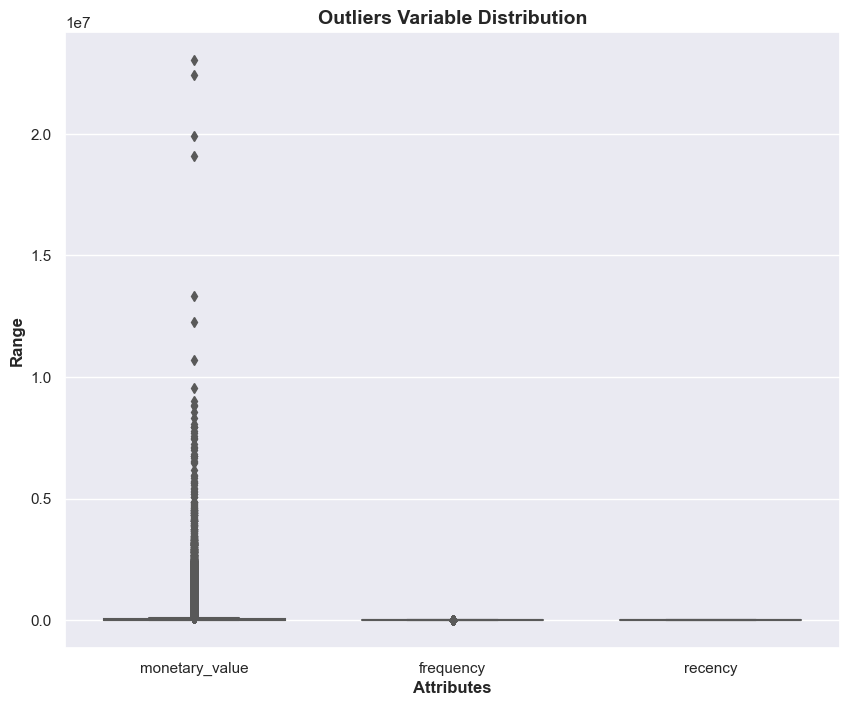

In [50]:
# Outlier Analysis of Monetary Value, Frequency, and Recency

attributes = ['monetary_value', 'frequency', 'recency']
plt.rcParams['figure.figsize'] = [10, 8]
sns.boxplot(data=rfm[attributes], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize=14, fontweight='bold')
plt.ylabel("Range", fontweight='bold')
plt.xlabel("Attributes", fontweight='bold')
plt.show()


In [51]:
# Removing (statistical) outliers for monetary_value
Q1 = rfm.monetary_value.quantile(0.05)
Q3 = rfm.monetary_value.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.monetary_value >= Q1 - 1.5 * IQR) & (rfm.monetary_value <= Q3 + 1.5 * IQR)]

# Removing (statistical) outliers for recency
Q1 = rfm.recency.quantile(0.05)
Q3 = rfm.recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.recency >= Q1 - 1.5 * IQR) & (rfm.recency <= Q3 + 1.5 * IQR)]

# Removing (statistical) outliers for frequency
Q1 = rfm.frequency.quantile(0.05)
Q3 = rfm.frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.frequency >= Q1 - 1.5 * IQR) & (rfm.frequency <= Q3 + 1.5 * IQR)]


In [52]:
# Rescaling the attributes

rfm_df = rfm[['monetary_value', 'frequency', 'recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)

# Check the shape of the scaled data
rfm_df_scaled.shape


(946252, 3)

In [53]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(rfm_df_scaled)

# Assign the labels to a new column in the original DataFrame
rfm['Cluster'] = kmeans.labels_



In [54]:
# Display the labels
print(kmeans.labels_)

[0 2 0 ... 0 0 0]


In [55]:
# Convert the scaled data back into a DataFrame
rfm_df_scaled = pd.DataFrame(rfm_df_scaled, columns=['monetary_value', 'frequency', 'recency'])

# Display the first few rows of the scaled DataFrame
rfm_df_scaled.head()

,monetary_value,frequency,recency
0,0.300679,0.218030,-0.976031
1,3.905417,6.408098,-0.659096
2,-0.076500,0.905815,-0.809684
3,1.901798,4.344742,-1.093350
4,-0.559044,-0.469756,-0.107524


In [56]:


# Elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.figure(figsize=(10, 8))
plt.plot(range_n_clusters, ssd, marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.grid(True)
plt.show()


KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt


KeyboardInterrupt: 

In [58]:
# Load the model
loaded_kmeans = joblib.load('C:/Users/toang/Desktop/Prethesis/kmeans_model.pkl')

print("K-means model loaded successfully")

# You can now use the loaded model for prediction or further analysis
clusters = loaded_kmeans.predict(rfm_df_scaled)
print(clusters)

K-means model loaded successfully
[0 2 0 ... 0 0 0]


In [ ]:
# from sklearn.metrics import silhouette_score

# # Silhouette analysis
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

# for num_clusters in range_n_clusters:
    
#     # Initialize kmeans
#     kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=42)
#     kmeans.fit(rfm_df_scaled)
    
#     cluster_labels = kmeans.labels_
    
#     # Compute the silhouette score
#     silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
#     print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


In [59]:
# Final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

# Assign the cluster labels to the original dataframe
rfm['Cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with cluster labels
rfm.head()


,user_id,recency,frequency,monetary_value,Cluster
0,50049,205,2,49497.0043,0
1,50174,386,11,226416.9146,1
2,50511,300,3,30985.1512,0
3,50565,138,8,128079.6304,1
4,53762,701,1,7302.0010,0


In [60]:
kmeans.labels_
cluster_labels = kmeans.labels_

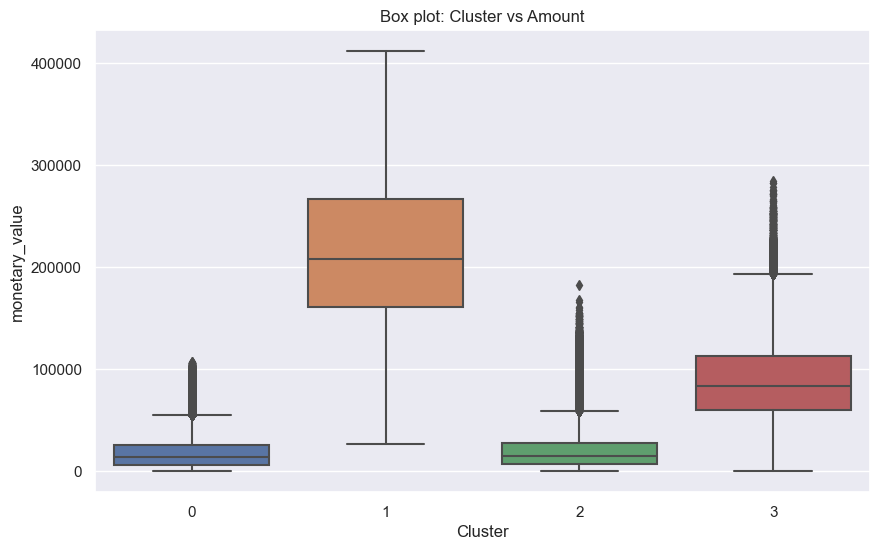

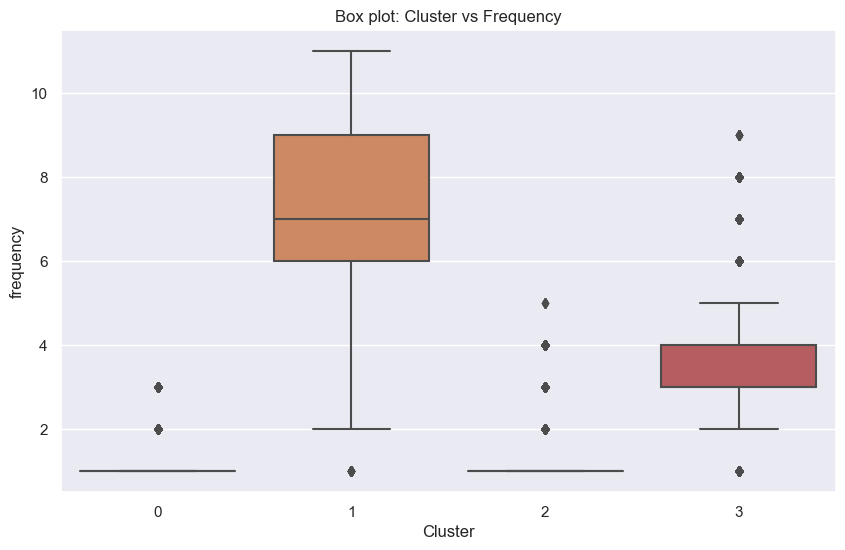

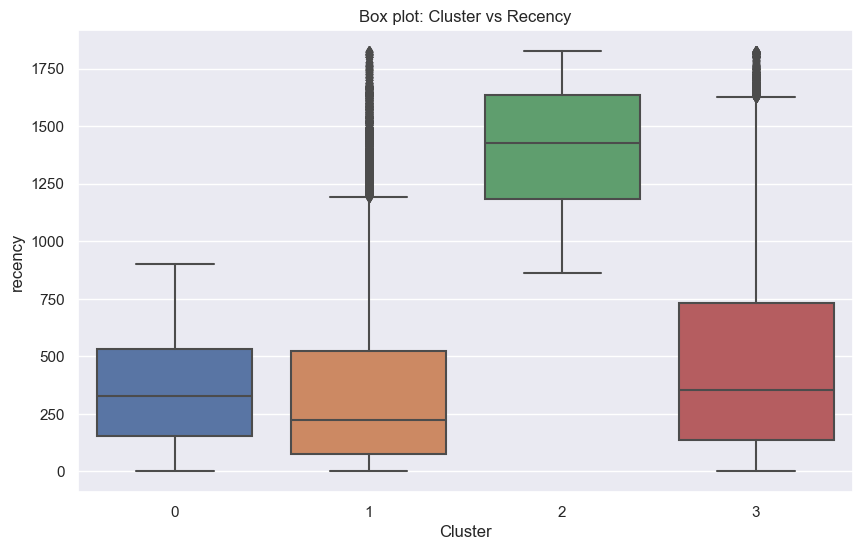

In [61]:
# Box plot to visualize Cluster vs Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='monetary_value', data=rfm)
plt.title('Box plot: Cluster vs Amount')
plt.show()

# Box plot to visualize Cluster vs Frequency
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='frequency', data=rfm)
plt.title('Box plot: Cluster vs Frequency')
plt.show()

# Box plot to visualize Cluster vs Recency
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='recency', data=rfm)
plt.title('Box plot: Cluster vs Recency')
plt.show()


In [62]:
# Save the model
joblib_file = "kmeans_model.pkl"
joblib.dump(kmeans, joblib_file)

print(f"K-means model saved to {joblib_file}")

K-means model saved to kmeans_model.pkl


In [63]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,user_id,recency,frequency,monetary_value,Cluster,Cluster_Labels
0,50049,205,2,49497.0043,0,0
1,50174,386,11,226416.9146,1,1
2,50511,300,3,30985.1512,0,0
3,50565,138,8,128079.6304,1,1
4,53762,701,1,7302.0010,0,0


<AxesSubplot:xlabel='Cluster_Labels', ylabel='monetary_value'>

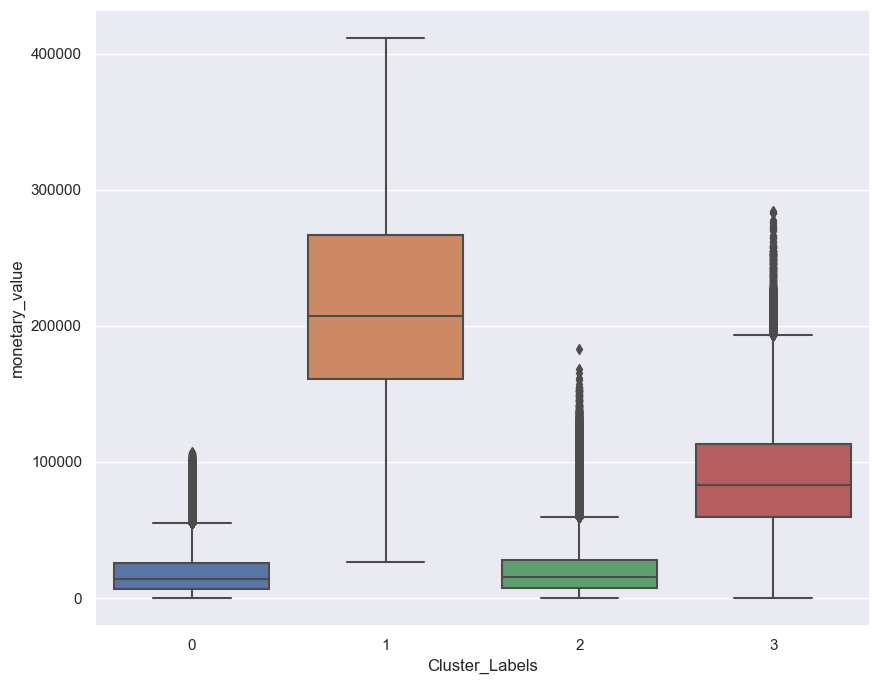

In [64]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='monetary_value', data=rfm)

In [ ]:
total.head()

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year,month,weekday,desc_copy,product,ic_copy,transaction_value,diff,days_since_last_transaction
0,403252497,401641461,1049.5,0.0,2018-08-11,TR ITA14TRK010 FF BROOKLYN STRAIGHT Beige 44 /...,TROUSER,Beige,112CM,East,East_7096,2018,August,Saturday,TR ITA14TRK010 FF BROOKLYN STRAIGHT Beige 44 /...,MENS TROUSER,TROUSER,2338.8000,1603 days,1604
1,357000026,397716483,659.4,0.0,2018-07-22,MB ITA14BLT016 35MM NA Olive Green 32 /,MB ITA14BLT016 35MM NA Olive Green 32 - 97CM,OLIVE GREEN,97CM,North,North_7018,2018,July,Sunday,MB ITA14BLT016 35MM NA Olive Green 32 /,MB,MB ITA14BLT016 35MM Olive Green 32 - 97CM,3118.8000,1623 days,1624
2,372773935,362298787,1899.0,0.0,2018-01-12,TR S15-NELSON FF KANSAS Tan 36 / 92CM,TROUSER,Tan,92CM,North,North_6505,2018,January,Friday,TR S15-NELSON FF KANSAS Tan 36 / 92CM,MENS TROUSER,TROUSER,1434.3000,1814 days,1815
3,362714910,360637282,1799.0,0.0,2018-01-03,TR S15-BRANDON FF KANSAS Khaki 32 / 82CM,TROUSER,Khaki,82CM,North,North_6505,2018,January,Wednesday,TR S15-BRANDON FF KANSAS Khaki 32 / 82CM,MENS TROUSER,TROUSER,1910.2650,1823 days,1824
4,393891557,374396867,1299.0,0.0,2018-03-29,MB ITA15BLT004 40MM NA Reddish Brown 38 / 112CM,ITA15BLT004-40MM,REDDISH BROWN,112CM,East,East_7310,2018,March,Thursday,MB ITA15BLT004 40MM NA Reddish Brown 38 / 112CM,MB,ITA15BLT004-40MM,5562.8997,1738 days,1739


## **Apply Apriori to RFM**

In [66]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Ensure the transaction data is correctly grouped and summed before unstacking
transaction_data = total.groupby(['bill_id', 'product']).agg({
    'line_item_amount': 'sum'
}).reset_index()

# Pivot the transaction data to create a basket format
basket = transaction_data.pivot(index='bill_id', columns='product', values='line_item_amount').fillna(0)
basket


product,B,BBG,BCP,BMK,BOYS DENIM,BOYS JACKET,BOYS Jogger,BOYS SHIRT,BOYS SHORTS,BOYS SWEATER,...,MS,MSS,Mens Wallet - Sportswear,SHirts,Trolley Bag,Unknown,WLT,WOTHERS,WOthers,soap
bill_id,,,,,,,,,,,,,,,,,,,,,
360301332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,2338.8,0.0,0.0,0.0,0.0
360302425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,3118.8,0.0,0.0,0.0,0.0
360304072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,1434.3,0.0,0.0,0.0,0.0
360304673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
360304720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798814687,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3058.20,0.0,0.0,0.0,0.0,0.0,0.0
800013947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2735.04,0.0,0.0,0.0,0.0,0.0,0.0
801738692,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5134.08,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# Convert to binary values for the Apriori algorithm
def encode_units(x):
    return 1 if x > 0 else 0

basket_sets = basket.applymap(encode_units)

# Apply the Apriori algorithm
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the results
print(frequent_itemsets)
print(rules)



     support                                           itemsets
0   0.020628                                       (BOYS DENIM)
1   0.040853                                       (BOYS SHIRT)
2   0.026634                                     (BOYS T-SHIRT)
3   0.019199                                     (BOYS TROUSER)
4   0.335124                                        (CARRY BAG)
..       ...                                                ...
73  0.021548  (MENS SHIRT, MENS TROUSER WITH BELT, MENS T-SH...
74  0.011330            (Trolley Bag, MENS SHIRT, MENS T-SHIRT)
75  0.034897  (Trolley Bag, MENS SHIRT, MENS TROUSER WITH BELT)
76  0.014460  (MENS SHIRT, MENS TROUSER WITH BELT, CARRY BAG...
77  0.011365  (Trolley Bag, MENS SHIRT, MENS TROUSER WITH BE...

[78 rows x 2 columns]
                             antecedents  \
0                           (BOYS DENIM)   
1                           (BOYS SHIRT)   
2                           (BOYS SHIRT)   
3                         (BOYS T

In [68]:
# Generate product recommendations for each customer segment
def recommend_products(rfm_clusters, rules, top_n=30):
    recommendations = {}
    for cluster in rfm_clusters:
        # Get the antecedents and consequents in list format
        antecedents = rules['antecedents'].apply(lambda x: list(x)).tolist()
        consequents = rules['consequents'].apply(lambda x: list(x)).tolist()
        
        # Create a list of recommended items for the cluster
        recommended_items = []
        for antecedent, consequent in zip(antecedents, consequents):
            if any(item in antecedent for item in rfm[rfm['Cluster'] == cluster]['user_id']):
                recommended_items.extend(consequent)
        
        # Select the top N recommended items based on lift
        cluster_rules = rules[rules['antecedents'].apply(lambda x: any(item in antecedent for item in x))]
        sorted_rules = cluster_rules.sort_values(by='lift', ascending=False)
        top_recommended_items = sorted_rules['consequents'].head(top_n)
        
        recommendations[cluster] = top_recommended_items
    return recommendations

# Assuming rfm_clusters is a list of unique RFM clusters from the clustering step
rfm_clusters = rfm['Cluster'].unique()
recommendations = recommend_products(rfm_clusters, rules)

# Display recommendations for each RFM segment
for cluster, items in recommendations.items():
    print(f"RFM Cluster: {cluster}")
    print(f"Recommended Products: {items}")
    print("-" * 50)

RFM Cluster: 0
Recommended Products: 110                           (Trolley Bag)
168                (Trolley Bag, CARRY BAG)
108                                (CTRIMS)
144                           (Trolley Bag)
173    (Trolley Bag, MENS SHIRT, CARRY BAG)
89                 (Trolley Bag, CARRY BAG)
147               (Trolley Bag, MENS SHIRT)
53                            (Trolley Bag)
112                   (Trolley Bag, CTRIMS)
156                 (MENS SHIRT, CARRY BAG)
163                            (MENS SHIRT)
164                           (Trolley Bag)
143                            (MENS SHIRT)
151                            (MENS SHIRT)
149                             (CARRY BAG)
74                              (CARRY BAG)
122                            (MENS SHIRT)
67                              (CARRY BAG)
33                              (MENS BELT)
78                  (MENS SHIRT, CARRY BAG)
170               (Trolley Bag, MENS SHIRT)
152                 (CARRY BAG, MENS DE

Cluster 0 has 30 recommended items before flattening.
Cluster 0 has 6 unique products after flattening.
Cluster 0 has 6 products after sorting by lift.
Cluster 0 has 6 products after selecting top 10.


<Figure size 1400x1000 with 0 Axes>

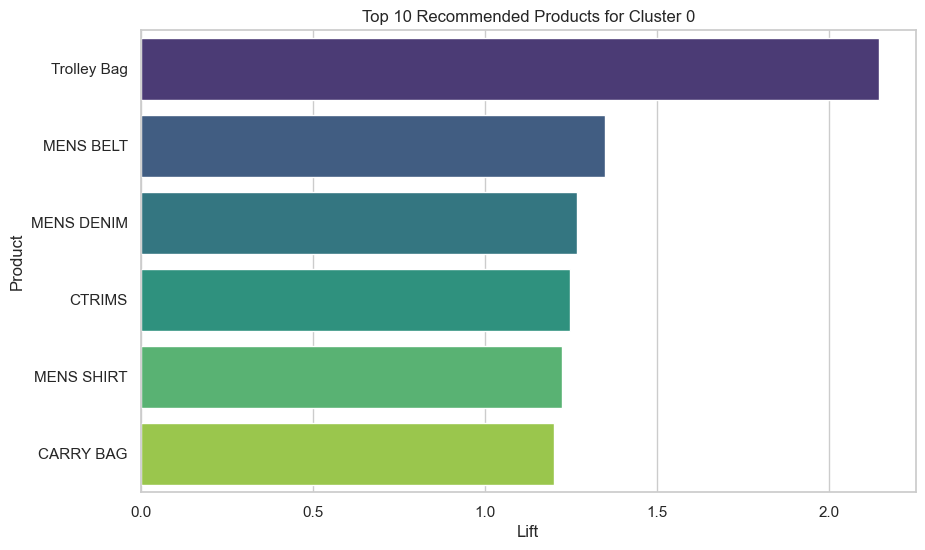

Cluster 1 has 30 recommended items before flattening.
Cluster 1 has 6 unique products after flattening.
Cluster 1 has 6 products after sorting by lift.
Cluster 1 has 6 products after selecting top 10.


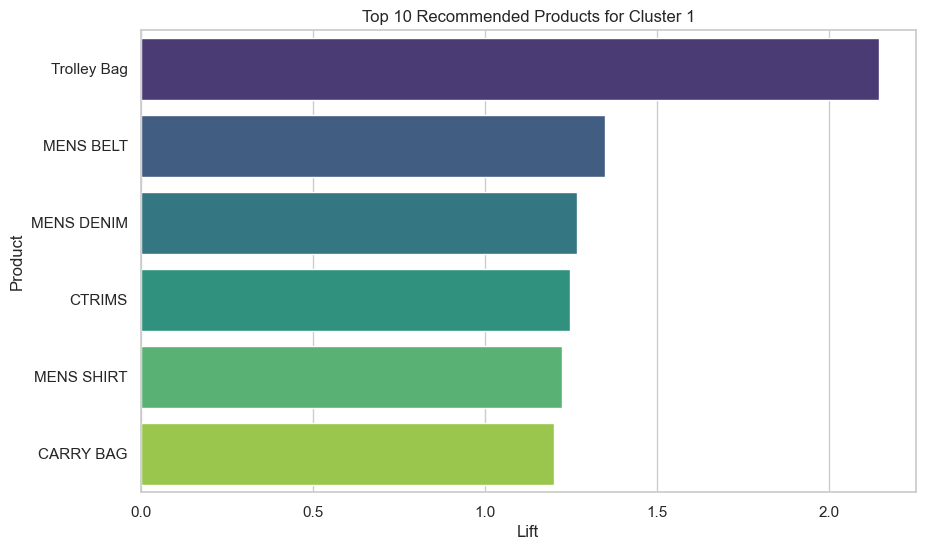

Cluster 3 has 30 recommended items before flattening.
Cluster 3 has 6 unique products after flattening.
Cluster 3 has 6 products after sorting by lift.
Cluster 3 has 6 products after selecting top 10.


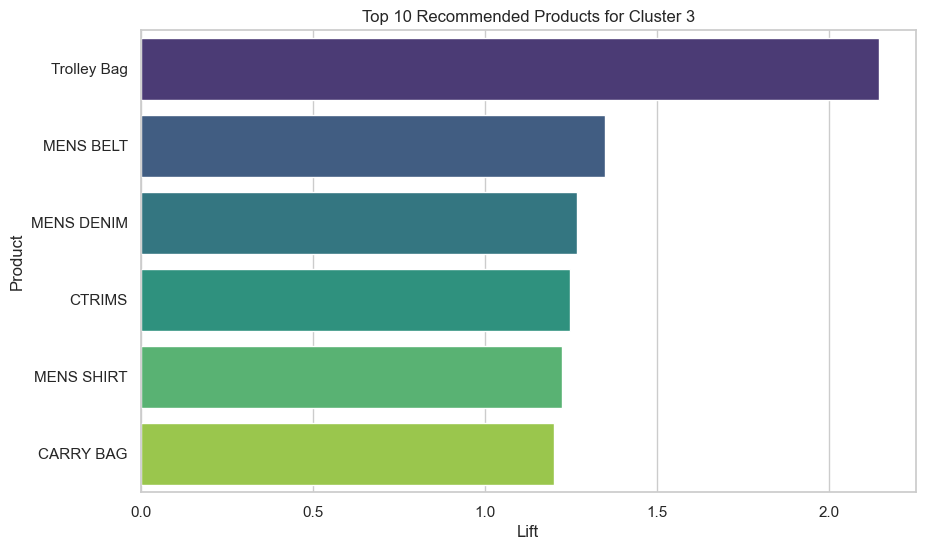

Cluster 2 has 30 recommended items before flattening.
Cluster 2 has 6 unique products after flattening.
Cluster 2 has 6 products after sorting by lift.
Cluster 2 has 6 products after selecting top 10.


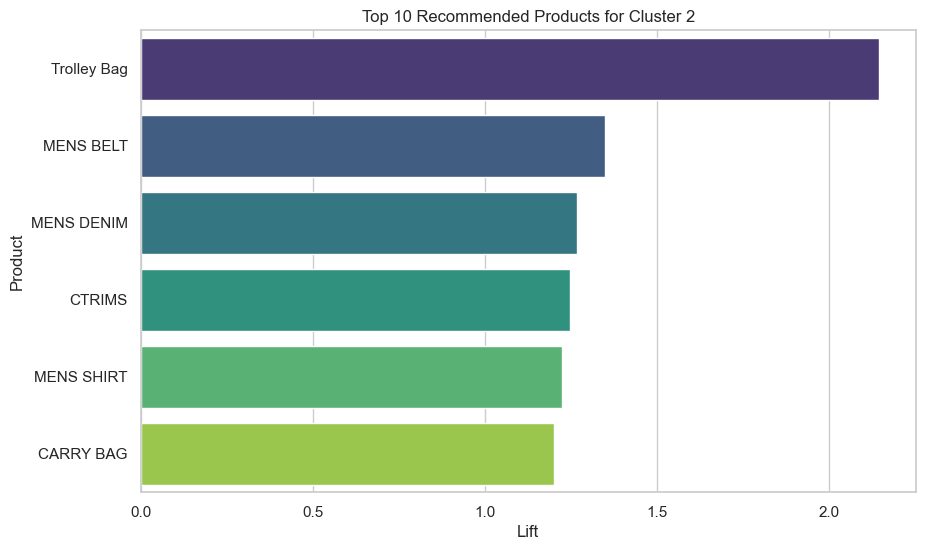

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Improved Visualization Part with Debugging
def visualize_recommendations(recommendations, rules, top_n=10):
    plt.figure(figsize=(14, 10))
    sns.set(style="whitegrid")
    
    for cluster, items in recommendations.items():
        print(f"Cluster {cluster} has {len(items)} recommended items before flattening.")
        
        plt.figure(figsize=(10, 6))
        
        # Prepare the data for visualization
        item_list = [list(item) for item in items]
        flat_list = [item for sublist in item_list for item in sublist]
        item_counts = pd.Series(flat_list).value_counts().reset_index()
        item_counts.columns = ['Product', 'Count']
        
        print(f"Cluster {cluster} has {len(item_counts)} unique products after flattening.")
        
        # Get the lift values for the recommended items
        lift_values = []
        for product in item_counts['Product']:
            lift = rules[rules['consequents'].apply(lambda x: product in x)]['lift'].values
            lift_values.append(lift[0] if len(lift) > 0 else 0)
        
        item_counts['Lift'] = lift_values
        
        # Sort the items by lift for better visualization
        item_counts = item_counts.sort_values(by='Lift', ascending=False)
        
        print(f"Cluster {cluster} has {len(item_counts)} products after sorting by lift.")
        
        # Ensure we display the top N unique recommended products
        unique_products = item_counts['Product'].unique()[:top_n]
        item_counts = item_counts[item_counts['Product'].isin(unique_products)]
        
        print(f"Cluster {cluster} has {len(item_counts)} products after selecting top {top_n}.")
        
        # Plot the data
        sns.barplot(x='Lift', y='Product', data=item_counts, palette='viridis')
        plt.title(f'Top {top_n} Recommended Products for Cluster {cluster}')
        plt.xlabel('Lift')
        plt.ylabel('Product')
        plt.show()

# Example Data for Recommendations and Rules
# Assuming `recommendations` and `rules` are already defined as per your previous steps

# Visualize the recommendations
visualize_recommendations(recommendations, rules, top_n=10)


## **Apply NtreeClus**

In [70]:
total.dtypes

user_id                                 int64
bill_id                                 int64
line_item_amount                      float64
bill_discount                         float64
transaction_date               datetime64[ns]
description                            object
inventory_category                     object
colour                                 object
size                                   object
zone_name                              object
store_name                             object
year                                    int64
month                                  object
weekday                                object
desc_copy                              object
product                                object
ic_copy                                object
days_since_last_transaction             int64
transaction_value                     float64
dtype: object

In [71]:
total.head(5)

,user_id,bill_id,line_item_amount,bill_discount,transaction_date,description,inventory_category,colour,size,zone_name,store_name,year,month,weekday,desc_copy,product,ic_copy,days_since_last_transaction,transaction_value
0,403252497,401641461,1049.5,0.0,2018-08-11,TR ITA14TRK010 FF BROOKLYN STRAIGHT Beige 44 /...,TROUSER,Beige,112CM,East,East_7096,2018,August,Saturday,TR ITA14TRK010 FF BROOKLYN STRAIGHT Beige 44 /...,MENS TROUSER,TROUSER,1604,2338.8000
1,357000026,397716483,659.4,0.0,2018-07-22,MB ITA14BLT016 35MM NA Olive Green 32 /,MB ITA14BLT016 35MM NA Olive Green 32 - 97CM,OLIVE GREEN,97CM,North,North_7018,2018,July,Sunday,MB ITA14BLT016 35MM NA Olive Green 32 /,MB,MB ITA14BLT016 35MM Olive Green 32 - 97CM,1624,3118.8000
2,372773935,362298787,1899.0,0.0,2018-01-12,TR S15-NELSON FF KANSAS Tan 36 / 92CM,TROUSER,Tan,92CM,North,North_6505,2018,January,Friday,TR S15-NELSON FF KANSAS Tan 36 / 92CM,MENS TROUSER,TROUSER,1815,1434.3000
3,362714910,360637282,1799.0,0.0,2018-01-03,TR S15-BRANDON FF KANSAS Khaki 32 / 82CM,TROUSER,Khaki,82CM,North,North_6505,2018,January,Wednesday,TR S15-BRANDON FF KANSAS Khaki 32 / 82CM,MENS TROUSER,TROUSER,1824,1910.2650
4,393891557,374396867,1299.0,0.0,2018-03-29,MB ITA15BLT004 40MM NA Reddish Brown 38 / 112CM,ITA15BLT004-40MM,REDDISH BROWN,112CM,East,East_7310,2018,March,Thursday,MB ITA15BLT004 40MM NA Reddish Brown 38 / 112CM,MB,ITA15BLT004-40MM,1739,5562.8997


In [11]:
from nTreeClus import nTreeClus
from sklearn.preprocessing import LabelEncoder


In [30]:
data = total.sample(frac=0.01, random_state=42)


In [18]:

# Filter out sequences shorter than 3 characters
filtered_sequences = [seq for seq in sequences if len(seq.split()) >= 3]

filtered_sequences

[]

In [33]:
def process_sequences_in_batches(sequences, batch_size):
    n_batches = len(sequences) // batch_size + 1
    results = []

    for i in range(n_batches):
        batch_sequences = sequences[i * batch_size:(i + 1) * batch_size]
        # Process each batch using nTreeClus
        model = nTreeClus(batch_sequences, n=None, method="All", ntree=10, C=None, verbose=1)
        model.nTreeClus()
        results.append(model.output())

    return results

In [35]:
sequences = data['description'].tolist()  # Replace 'sequence_column' with the actual column name

# Process the sequences in batches
batch_size = 5000  # Adjust the batch size as needed
results = process_sequences_in_batches(sequences, batch_size)

Finding the parameter 'n'
Parameter 'n' is set to 4



Matrix Segmentation (Splitting based on window size): 100%|██████████| 5000/5000 [00:00<00:00, 19639.22it/s]


one-hot encoding + x/y train
Fit DT
DataFrame of terminal nodes
Determining the cosine Distance
Applying Ward Linkage


Finding the optimal number of clusters


KeyboardInterrupt: 

In [27]:
# Extract the 'description' column as the sequences for clustering
sequences = data['description'].dropna().tolist()
filtered_sequences = [seq for seq in sequences if len(seq.split()) >= 3]
# Initialize the nTreeClus model
model = nTreeClus(filtered_sequences, n=None, method="All", ntree=10, C=None, verbose=1)
model.nTreeClus()

# Output the results
output = model.output()
print(output)


Matrix Segmentation (Splitting based on window size):   5%|▍         | 3721/77669 [00:00<00:09, 7785.06it/s]

Finding the parameter 'n'
Parameter 'n' is set to 7


Matrix Segmentation (Splitting based on window size): 100%|██████████| 77669/77669 [00:03<00:00, 23574.52it/s]


one-hot encoding + x/y train
Fit DT
DataFrame of terminal nodes
Determining the cosine Distance


MemoryError: Unable to allocate 41.3 GiB for an array with shape (5536671471,) and data type float64

In [ ]:
# Sample the data to make it manageable
sampled_total = total.sample(frac=0.05, random_state=42)

# Encode the product and zone_name columns
label_encoder_product = LabelEncoder()
label_encoder_zone = LabelEncoder()

sampled_total['encoded_product'] = label_encoder_product.fit_transform(sampled_total['product'])
sampled_total['encoded_zone'] = label_encoder_zone.fit_transform(sampled_total['zone_name'])


sequences = sampled_total.groupby('user_id').apply(
    lambda x: ' '.join(x['encoded_product'].astype(str) + '_' + x['encoded_zone'].astype(str))
).tolist()

# Filter out sequences shorter than 3 characters
filtered_sequences = [seq for seq in sequences if len(seq.split()) >= 3]



In [ ]:
# Initialize and run nTreeClus
model = nTreeClus(filtered_sequences, n=None, method="All", ntree=10, verbose=1)
model.nTreeClus()

# Output the results
output = model.output()
print(output)


Matrix Segmentation (Splitting based on window size):  14%|█▍        | 4804/33536 [00:00<00:00, 47640.46it/s]

Finding the parameter 'n'
Parameter 'n' is set to 6


Matrix Segmentation (Splitting based on window size): 100%|██████████| 33536/33536 [00:02<00:00, 11197.65it/s]


one-hot encoding + x/y train
Fit DT
DataFrame of terminal nodes
Determining the cosine Distance
Applying Ward Linkage


Finding the best number of clusters (DT):   0%|          | 0/9 [00:00<?, ?it/s]

Finding the optimal number of clusters


In [ ]:
data=total.sample(frac=0.05, random_state=42)

NameError: name 'Fix' is not defined

In [ ]:
# Select relevant columns
data_selected = data[['user_id', 'inventory_category', 'transaction_date', 'colour', 'size', 'zone_name', 'store_name']]

# Convert categorical columns to strings
data_selected = data_selected.astype(str)

# Ensure the transaction_date is in datetime format
data_selected['transaction_date'] = pd.to_datetime(data_selected['transaction_date'])


In [ ]:
# Sort by user_id and transaction_date
data_sorted = data_selected.sort_values(by=['user_id', 'transaction_date'])

# Create sequences by grouping transactions for each user
user_sequences = data_sorted.groupby('user_id').agg(lambda x: ' '.join(x)).reset_index()


In [ ]:

# Prepare data for nTreeClus
sequences = user_sequences['inventory_category'].tolist()

# Initialize and fit nTreeClus
ntc = nTreeClus(method='RF', n_clusters=5, n_estimators=100)
ntc.fit(sequences)

# Get the cluster labels
labels = ntc.labels_
user_sequences['cluster'] = labels

# Display the resulting clusters
print(user_sequences[['user_id', 'cluster']])